Question - Different ROC curves for feature detection.

For this I have calculated the right values and then computed the predicted values using the feature detector. I have plotted the ROC curve - True Positive Rate vs False Positives. 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [36]:
image = plt.imread('../characters.png')
image_gray = image[:,:,0]
template = plt.imread('../template.png')
template = template[:,:,0]

In [37]:
image_height = image_gray.shape[0]
image_width = image_gray.shape[1]
template_height = template.shape[0]
template_width = template.shape[1]

In [50]:
right_values = [(321, 9), (448, 9), (517, 9), (19, 42), (64, 42), (18, 75), (412, 75), (565, 75), (141, 141), (291, 141), (485, 141), (585, 141), (614, 141), (355, 173), (388, 206), (526, 206), (596, 206), (407, 239), (498, 239), (168, 272), (521, 272), (619, 272), (317, 305), (375, 305), (475, 305), (85, 338), (570, 338), (18, 371), (152, 371), (87, 404), (265, 404), (619, 404), (174, 436), (68, 469), (239, 469), (613, 469), (79, 502), (313, 502)]

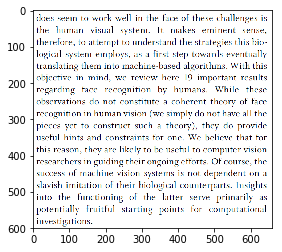

In [39]:
plt.imshow(image)
plt.show()

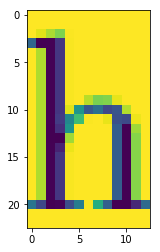

(23, 13)


In [40]:
plt.imshow(template)
plt.show()
print(template.shape)

In [4]:
def calcMetrics(true_values, predicted_values):
    count_correct = 0
    for each_value in predicted_values:
        if each_value in true_values:
            count_correct += 1
    TP = count_correct
    FN = len(true_values) - count_correct
    FP = len(predicted_values) - count_correct
    return TP, FP, FN        

In [5]:
def threshold(sub_img, template):
    equals = 0
    total = 0
    for i in range(0, template.shape[0]):
        for j in range(0, template.shape[1]):
            total += 1
            if sub_img[i,j] == template[i,j]:
                equals += 1
    return equals / float(total)

In [6]:
def detect_feature(image_gray, template, limit):
    #fig, ax = plt.subplots(1)
    image_height = image_gray.shape[0]
    image_width = image_gray.shape[1]
    template_height = template.shape[0]
    template_width = template.shape[1]
    count = 0
    bottom_left_points = []
    for i in range(0, (image_height - template_height)):

        for j in range(0, (image_width - template_width)):

            sub_img = image_gray[i:template_height+i, j:template_width+j]
            threshold_val = threshold(sub_img, template)
            if threshold_val > limit: #Adding a rectangle box
                count += 1
                bottom_left_x = j
                bottom_left_y = i
                bottom_left_points.append((bottom_left_x, bottom_left_y))
                rectangle = patches.Rectangle((bottom_left_x,bottom_left_y), template_width, template_height, linewidth=1, edgecolor='r', facecolor='none')
                ax.add_patch(rectangle)
    #ax.imshow(image)
    #plt.show()
    return count, bottom_left_points

In [71]:
TPR_list = []
FP_list = []
count, predicted_values = detect_feature(image_gray, template, 0.60)
TP, FP, FN = calcMetrics(right_values, predicted_values)
TPR_list.append(float(TP)/(TP + FN))
FP_list.append(FP)
print(TP, FP, FN)

38 100 0


In [72]:
count, predicted_values = detect_feature(image_gray, template, 0.61)
TP, FP, FN = calcMetrics(right_values, predicted_values)
TPR_list.append(float(TP)/(TP + FN))
FP_list.append(FP)
print(TP, FP, FN)

38 92 0


In [73]:
count, predicted_values = detect_feature(image_gray, template, 0.62)
TP, FP, FN = calcMetrics(right_values, predicted_values)
TPR_list.append(float(TP)/(TP + FN))
FP_list.append(FP)
print(TP, FP, FN)

38 9 0


In [74]:
count, predicted_values = detect_feature(image_gray, template, 0.63)
TP, FP, FN = calcMetrics(right_values, predicted_values)
TPR_list.append(float(TP)/(TP + FN))
FP_list.append(FP)
print(TP, FP, FN)

38 8 0


In [75]:
count, predicted_values = detect_feature(image_gray, template, 0.64)
TP, FP, FN = calcMetrics(right_values, predicted_values)
TPR_list.append(float(TP)/(TP + FN))
FP_list.append(FP)
print(TP, FP, FN)

38 0 0


In [76]:
count, predicted_values = detect_feature(image_gray, template, 0.66)
TP, FP, FN = calcMetrics(right_values, predicted_values)
TPR_list.append(float(TP)/(TP + FN))
FP_list.append(FP)
print(TP, FP, FN)

0 0 38


In [77]:
count, predicted_values = detect_feature(image_gray, template, 0.67)
TP, FP, FN = calcMetrics(right_values, predicted_values)
TPR_list.append(float(TP)/(TP + FN))
FP_list.append(FP)
print(TP, FP, FN)

0 0 38


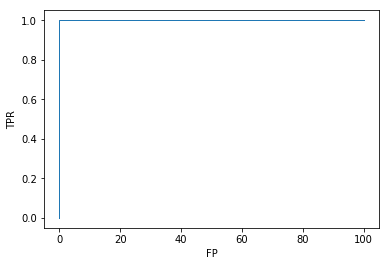

In [78]:
plt.plot(FP_list, TPR_list, '-', linewidth=1)
plt.xlabel("FP")
plt.ylabel("TPR")
plt.show()